In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run init.py

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from snorkel.annotations import save_marginals

In [6]:
from snorkel.learning import GenerativeModelLinear

In [7]:
from snorkel.lf_helpers import *
import pickle,glob

In [8]:
import pandas as pd
from MLutils import cohen_kappa_score

In [9]:
from MLutils import diversity_heatmap, merge_pickles_pred_dicts

In [380]:
# needed to train the LSTM here
train = session.query(REGULATOR).filter(REGULATOR.split == 0).all()
dev = session.query(REGULATOR).filter(REGULATOR.split == 1).all()
test = session.query(REGULATOR).filter(REGULATOR.split == 2).all()
unlab = session.query(REGULATOR).filter(REGULATOR.split == 3).all()

In [11]:
# make sure unmapped cands are gone

In [12]:
from sqlalchemy import  any_,or_,and_

In [13]:
#create list of unmapped cands to drop
to_drop = []
for k in range(3):
    query = session.query(REGULATOR).filter(and_(REGULATOR.split==k,~REGULATOR.gold_labels.any()))
    print 'Adding %i candidates from split=%i in to_drop list'%(query.count(), k)
    to_drop.extend(map(lambda x: x.id,query.all()))

Adding 0 candidates from split=0 in to_drop list
Adding 0 candidates from split=1 in to_drop list
Adding 0 candidates from split=2 in to_drop list


In [14]:
# #drop unmapped cands
# query = session.query(Candidate).filter(Candidate.id.in_(to_drop))
# print query.count()
# query.delete(synchronize_session=False)
# session.commit()

# Retrieve results and pick models

In [15]:
# results_dict = merge_pickles_pred_dicts(glob.glob('ml_predictions/*.pkl'), 
#                                         f1_threshold=0.49,
#                                         list_substr=['results_dict,','minFreq=3','_'],
#                                         best_model=True,
#                                        )

In [16]:
with open("ml_predictions/12models_clustering_outerdistances.pickle", 'rb') as f:
    results_dict = pickle.load(f)
print 'Loaded:\n',
results_dict.keys()

Loaded:


['results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear',
 'results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear',
 'RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM',
 'fasttext_fasttext',
 'results_dict,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(0, 3),LSA100_NeuralNet(10,10)',
 'results_dict,lemmas,RuS,CV_,bin_,minFreq=1,_ngrams=(1, 1),LSA100_LogisticRegression',
 'results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_RandomForestClassifier',
 'results_dict,trim=5,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(0, 3),LSA100_SVC_linear',
 'results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier',
 'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_LogisticRegression',
 'results_dict,ShortDepPath,RuS,TfIdf_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear',
 'results_dict,lemmas,RuS,TfIdf_,minFreq=1,_stopw=english,_ngr

In [17]:
selected_models = results_dict.keys()

In [16]:
# set(results_dict[results_dict.keys()[0]])

In [17]:
# unlab_keys0 = set(results_dict[results_dict.keys()[0]]['label_unlab_prob_dict'].keys())
# #check model performance
# for model_name in results_dict.keys():
#     print '\n',results_dict[model_name]['f1+'], model_name
#     print 'Keys matching: ',unlab_keys0 == set(results_dict[model_name]['label_unlab_prob_dict'].keys())
#     result_prob = [results_dict[model_name]['label_unlab_prob_dict'][cid] for cid in sorted(results_dict[model_name]['label_unlab_prob_dict'].keys(), reverse=True)]
#     result_bin = [0 if prob<=0.5 else 1 for prob in result_prob]
#     print result[:10]
#     print result_bin[-1110:-1000]
    
    
#     print result_unlab_binary01[-1110:-1000]
    
# #     print result_bin == result_unlab_binary01
    
    
#     # deal with this shit later.... nice confidence there man!
# #     pd.Series(result).hist()
# #     plt.plot()

In [18]:
# result = [results_dict[key] for model_name in sorted(results_dict.keys(), reverse=True)]

** heuristic developed for model selection **

(replaced by classifier selection.ipynb )


In [20]:
# model_names = sorted(results_dict.keys())
# cohens_df = pd.DataFrame(index=model_names, columns=model_names)

In [21]:
# evaluate_on= 'label_val_binary'
# for i,model1 in enumerate(cohens_df.index):
#     for j,model2 in enumerate(cohens_df.columns):
#         if i==j:
#             cohens_df.iloc[i,j] = 0
#         else:
#             cohens_df.iloc[i,j] = cohen_kappa_score(results_dict[model1][evaluate_on],results_dict[model2][evaluate_on])

In [22]:
# cohens_df.mean().sort_values().index[0]

In [23]:
# selected_models = ['trim=5,RuS,CV,bin,,stopw=english,LSA100_SVC_rbf_C=500',
#                   'lemmas,RuS,TfIdf,,stopw=english_SVC_rbf_C=500'
                  
#                   ]
# candidate_model = ['trim=5,lemmas,RuS,TfIdf,,stopw=english_LogisticRegression',]


# max([cohens_df.ix[candidate_model, selected_model].values[0] for selected_model in selected_models])

In [24]:

# def select_models(cohens_df, diversity_threshold , f1_threshold=0):
#     selected_models = [cohens_df.mean().sort_values().index[0]]
#     for candidate_model in cohens_df.mean().sort_values().index[1:]:
#         #check whether all cohens kappas are < threshold
#         if max([cohens_df.ix[candidate_model, selected_model] for selected_model in selected_models])<diversity_threshold:
#             selected_models.append(candidate_model)
#     return selected_models


In [25]:
# selected_models = select_models(cohens_df, diversity_threshold = 0.2, )

# selected_models
# # results_dict1 = {}
# # for key in selected_models:
# #     results_dict1[key]=results_dict[key]

In [18]:
from MLutils import diversity_matrix, reduce_results_dict

In [19]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

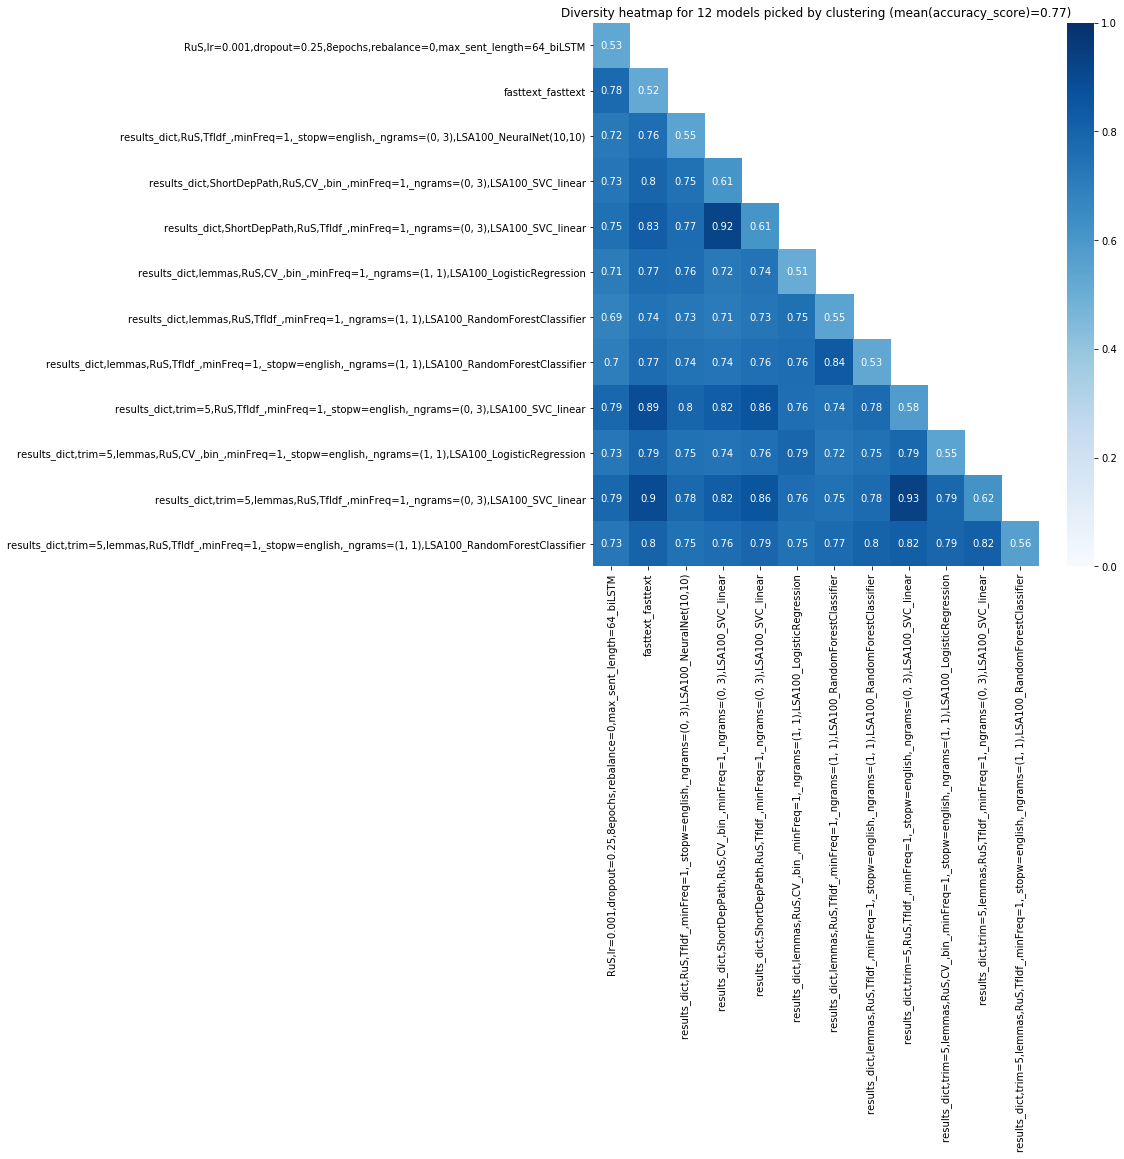

In [20]:
metric = accuracy_score

mean = diversity_matrix(
    results_dict,
    metric=accuracy_score,
    diagonal_key=None
).mean().mean()

diversity_heatmap(results_dict, 
                  metric=metric, diagonal_key='f1+', 
                  evaluate_on = "label_unlab_prob+",
                  title='Diversity heatmap for %i models picked by clustering (mean(%s)=%.2f)'%(
                      len(results_dict),metric.__name__, mean) )

In [18]:
# lowest_model_name = cohens_df.mean().idxmin()
# print cohens_df.mean().idxmin() , cohens_df.mean().min()

# Load predicted labels from classifiers

In [21]:
from snorkel.annotations import LabelAnnotator

** with label generator **

In [22]:
# Include the results for validation data
def signal_annotator_unlab_val(c):
    """A generator over the different (worker_id, label_id) pairs for a Tweet."""
    for model in results_dict.keys():

        #hack to convert labels to -1,1....
        try:
            yield model, (results_dict[model]['label_unlab_prob+'][c.id] >= 0.5)*2-1
        except:
            yield model, (results_dict[model]['label_val_prob+'][c.id] >= 0.5)*2-1


labeler = LabelAnnotator(label_generator=signal_annotator_unlab_val)

In [41]:
# %time L_train = labeler.apply(split=3, parallelism=6)
# L_train

Clearing existing...
Running UDF...
CPU times: user 14min 26s, sys: 35.7 s, total: 15min 2s
Wall time: 57min 11s


<79400x12 sparse matrix of type '<type 'numpy.int64'>'
	with 952800 stored elements in Compressed Sparse Row format>

In [124]:
# # dump vote matrix to disk
# with open("L_train_12_models", 'wb') as f:
#     pickle.dump(L_train, f)

In [23]:
#open from disk
with open("L_train_12_models", 'rb') as f:
    L_train = pickle.load(f)

In [24]:
# load from developer set & labels
L_gold_dev = load_gold_labels(session, annotator_name='gold', split=1)
L_gold_dev
print ''
L_dev = labeler.apply_existing(split=1, parallelism=6)
L_dev


Clearing existing...
Running UDF...


<3230x12 sparse matrix of type '<type 'numpy.int64'>'
	with 38760 stored elements in Compressed Sparse Row format>

# Balance L_train

In [363]:
(pd.Series(list(map(lambda x:x[0].item(),L_train.mean(axis=1))))>=0.5).value_counts()

False    74296
True      5104
dtype: int64

In [365]:
74296/5104.

14.556426332288401

Text(0.5,1,'Unweighted voting for 12 classifiers')

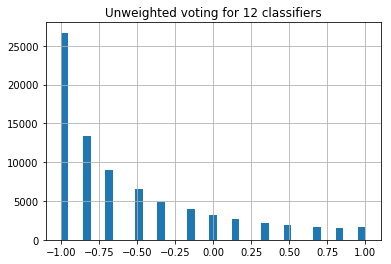

In [21]:
#this would be with unweighted voting

pd.Series(list(map(lambda x:x[0].item(),L_train.mean(axis=1)))).hist(bins=41)
plt.title('Unweighted voting for 12 classifiers')

## Randomly delete some negative values (about 50% of them). 
-> 
denoising doesn't work leaving code here for future reference though

In [99]:
# Randomly delete some negative values (about 50% of them). 
# However, this creates a bias towards positive class 
#  + denoising doesn't work

In [130]:
# neg_L_train = L_train==-1
# pos_L_train = L_train==1

In [131]:
# create a (random) mask

In [132]:
# from scipy.sparse import rand

# rand_csr = rand(L_train.shape[0], L_train.shape[1], density=0.5, format='csr')
# rand_csr.data[:] = 1

In [136]:
# L_train_subsampled = L_train.multiply(neg_L_train.multiply(rand_csr) + pos_L_train)

## Undersample examples having mean(votes) <0.5

In [ ]:
L_train_lbls = list(map(lambda x: int(x[0].item()), L_train.mean(axis=1)>=0.5))

In [146]:
(L_train.mean(axis=1)>=0.5).astype(int)

matrix([[False],
        [False],
        [False],
        ..., 
        [False],
        [False],
        [False]], dtype=object)

In [150]:
from MLutils import balance_candidates
from utils import delete_from_csr

In [153]:
ind_us, lbls_us = balance_candidates(indices, lbls)
indices = [i for i in range(L_train.shape[0])]
ind_to_del = list(set(indices).difference(set(ind_us)))

In [155]:
L_train_us = delete_from_csr(L_train,row_indices=ind_to_del)


In [157]:
L_train.shape

(79400, 12)

In [158]:
L_train_us.shape

(10208, 12)

# Start denoising

In [113]:

# see how many LF vote on how many examples & with how many other LFs there are votes on common examples
L_train.lf_stats(session)


,j,Coverage,Overlaps,Conflicts
"results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear",0,1.0,1.0,0.642922
"results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear",1,1.0,1.0,0.642922
"RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM",2,1.0,1.0,0.642922
fasttext_fasttext,3,1.0,1.0,0.642922
"results_dict,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(0, 3),LSA100_NeuralNet(10,10)",4,1.0,1.0,0.642922
"results_dict,lemmas,RuS,CV_,bin_,minFreq=1,_ngrams=(1, 1),LSA100_LogisticRegression",5,1.0,1.0,0.642922
"results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_RandomForestClassifier",6,1.0,1.0,0.642922
"results_dict,trim=5,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(0, 3),LSA100_SVC_linear",7,1.0,1.0,0.642922
"results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier",8,1.0,1.0,0.642922
"results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_LogisticRegression",9,1.0,1.0,0.642922


In [233]:
# Find dependencies between LFs

from snorkel.learning.structure import DependencySelector
ds = DependencySelector()
deps1 = ds.select(L_train_us, threshold=0.1)
deps2 = ds.select(L_train_us, threshold=0.2)
deps3 = ds.select(L_train_us, threshold=0.3)
deps05 = ds.select(L_train_us, threshold=0.05)
deps01 = ds.select(L_train_us, threshold=0.01)

print len(deps01),len(deps05),len(deps1),len(deps2),len(deps3)

66 51 35 11 4


In [345]:
# Generate all possible dependencies with threshold from 0 to 0.15
all_deps = [ds.select(L_train_us, threshold=thresh) for thresh in np.array(range(5,14))/100.]
print list(map(lambda x: len(x) ,all_deps))
all_deps = list(np.unique(all_deps)) # delete duplicates for gridsearch
print list(map(lambda x: len(x) ,all_deps))


[51, 46, 41, 36, 35, 35, 34, 32, 30]
[30, 32, 34, 35, 36, 41, 46, 51]


# Train the generative model with altered $\beta \simeq 0.38 $ 

In [161]:
%%time
### Normal training

# actual training of the gen. model
from snorkel.learning import GenerativeModel

gen_model = GenerativeModel(lf_propensity=True, class_prior=False )
gen_model.train(
    L_train_us, decay=0.95, step_size=0.1/L_train.shape[0], reg_param=1e-6,  threads = 6,
    deps=deps,
)


Inferred cardinality: 2
CPU times: user 37.8 s, sys: 71.6 ms, total: 37.9 s
Wall time: 16 s


In [162]:
gen_model.learned_lf_stats()

,Accuracy,Coverage,Precision,Recall
0,0.920615,0.8125,0.950539,0.742202
1,0.912340,0.7974,0.938179,0.726357
2,0.914920,0.8110,0.938644,0.744842
3,0.915871,0.8166,0.944155,0.747813
4,0.929098,0.8279,0.952712,0.768114
5,0.929640,0.8286,0.950627,0.775375
6,0.934440,0.8374,0.954281,0.785443
7,0.926912,0.8223,0.952234,0.763327
8,0.921424,0.8145,0.949029,0.749794
9,0.931904,0.8209,0.953322,0.771910


In [164]:
train_marginals_us = gen_model.marginals(L_train_us)

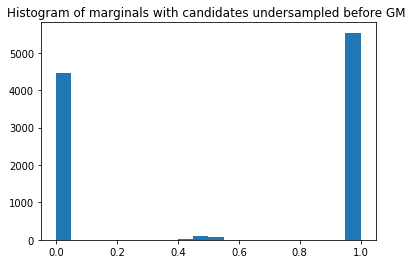

In [166]:
plt.hist(train_marginals_us, bins=20)
plt.title('Histogram of marginals with candidates undersampled before GM ')
plt.show()

### Hyperparameter search

In [346]:
from snorkel.learning import RandomSearch, GenerativeModel, GridSearch

In [349]:
param_ranges = { # parameters for the train function of the GenerativeModel
    'step_size' : [1e-2,1e-3,1e-4],
    'decay' : [0.95,0.99],
    'epochs' : [300],
    'reg_param': [1e-50 ,1e-100 ,1e-200 ],
    'deps': all_deps
}

model_class_params = {  # parameters for the GenerativeModel
    'lf_propensity': [True]
}

searcher = RandomSearch(GenerativeModel, param_ranges,  L_train_us, model_class_params = model_class_params , n=80 )


In [350]:
%%time
gen_model, run_stats = searcher.fit(L_dev, L_gold_dev, n_threads=7 )
run_stats['#deps'] = list(map(lambda x: len(run_stats.deps[x]), run_stats.index)) # save # deps to identify 'deps'

Loading data...
Launching jobs...
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
Inferred cardinality: 2
[GenerativeModel] Model saved as <GenerativeModel_6>.
[GenerativeModel] Model saved as <GenerativeModel_1>.
[GenerativeModel] Model saved as <GenerativeModel_4>.
[GenerativeModel] Model saved as <GenerativeModel_0>.
[GenerativeModel] Model saved as <GenerativeModel_2>.
[GenerativeModel] Model saved as <GenerativeModel_3>.
Inferred cardinality: 2
Model 6 Done; score: 0.587398796246
Inferred cardinality: 2
Model 4 Done; score: 0.0297170460751
Inferred cardinality: 2
Model 1 Done; score: 0.0305899967466
Inferred cardinality: 2
Model 0 Done; score: 0.401593928553
Inferred cardinality: 2
Model 2 Done; score: 0.841874887733
Inferred cardinality: 2
Model 3 Done; score: 0.739640627013
[GenerativeModel] Model saved as <GenerativeModel_5>.
Inferred cardinality: 2
Model 5 Done; score: 0.51697737142

[GenerativeModel] Model saved as <GenerativeModel_69>.
[GenerativeModel] Model saved as <GenerativeModel_70>.
[GenerativeModel] Model saved as <GenerativeModel_71>.
Inferred cardinality: 2
Model 70 Done; score: 0.46083452143
Inferred cardinality: 2
Model 69 Done; score: 0.67667359732
[GenerativeModel] Model saved as <GenerativeModel_72>.
Inferred cardinality: 2
Model 71 Done; score: 0.0365215605619
Inferred cardinality: 2
Model 72 Done; score: 0.0365215605619
[GenerativeModel] Model saved as <GenerativeModel_73>.
Model 73 Done; score: 0.697455504149
[GenerativeModel] Model saved as <GenerativeModel_74>.
[GenerativeModel] Model saved as <GenerativeModel_75>.
Model 74 Done; score: 0.0297170460751
Model 75 Done; score: 0.770770887387
[GenerativeModel] Model saved as <GenerativeModel_77>.
[GenerativeModel] Model saved as <GenerativeModel_76>.
Model 77 Done; score: 0.0290532496728
Model 76 Done; score: 0.0377941973103
[GenerativeModel] Model saved as <GenerativeModel_79>.
[GenerativeModel] 

In [351]:
run_stats

,Model,epochs,step_size,reg_param,deps,decay,Prec.,Rec.,F-1,#deps
43,42,300,0.0001,1.000000e-100,"{(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...",0.95,0.609502,-0.588270,1.036092,34
50,50,300,0.0001,1.000000e-200,"{(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...",0.95,0.609502,-0.588270,1.036092,34
38,38,300,0.0001,1.000000e-100,"{(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...",0.95,0.616845,-0.599823,1.028378,32
53,53,300,0.0001,1.000000e-200,"{(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...",0.95,0.616845,-0.599823,1.028378,32
25,26,300,0.0010,1.000000e-200,"{(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...",0.95,0.646722,-0.640857,1.009151,34
64,65,300,0.0001,1.000000e-50,"{(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...",0.95,0.615195,-0.672006,0.915460,30
55,55,300,0.0001,1.000000e-200,"{(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...",0.99,0.606061,-0.669729,0.904934,32
27,27,300,0.0001,1.000000e-50,"{(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...",0.99,0.561404,-0.666849,0.841875,34
4,2,300,0.0001,1.000000e-100,"{(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...",0.99,0.561404,-0.666849,0.841875,34
9,7,300,0.0010,1.000000e-200,"{(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...",0.99,0.641611,-0.802252,0.799762,36


Model                                                       42
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.609502
Rec.                                                  -0.58827
F-1                                                    1.03609
#deps                                                       34
Name: 43, dtype: object
[GenerativeModel] Model <GenerativeModel_42> loaded.


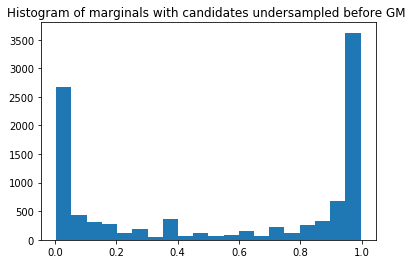




Model                                                       50
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.609502
Rec.                                                  -0.58827
F-1                                                    1.03609
#deps                                                       34
Name: 50, dtype: object
[GenerativeModel] Model <GenerativeModel_50> loaded.


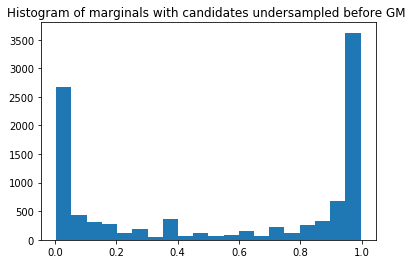




Model                                                       38
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.616845
Rec.                                                 -0.599823
F-1                                                    1.02838
#deps                                                       32
Name: 38, dtype: object
[GenerativeModel] Model <GenerativeModel_38> loaded.


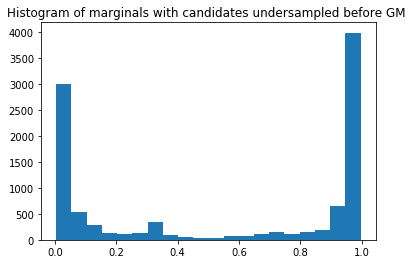




Model                                                       53
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.616845
Rec.                                                 -0.599823
F-1                                                    1.02838
#deps                                                       32
Name: 53, dtype: object
[GenerativeModel] Model <GenerativeModel_53> loaded.


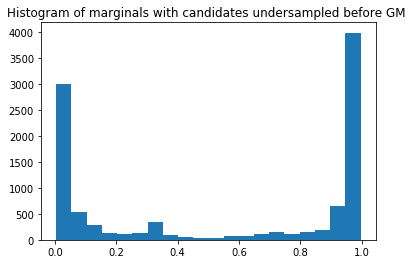




Model                                                       26
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.646722
Rec.                                                 -0.640857
F-1                                                    1.00915
#deps                                                       34
Name: 25, dtype: object
[GenerativeModel] Model <GenerativeModel_26> loaded.


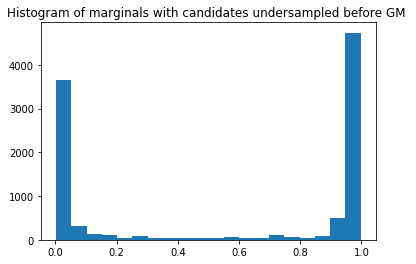




Model                                                       65
epochs                                                     300
step_size                                               0.0001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.615195
Rec.                                                 -0.672006
F-1                                                    0.91546
#deps                                                       30
Name: 64, dtype: object
[GenerativeModel] Model <GenerativeModel_65> loaded.


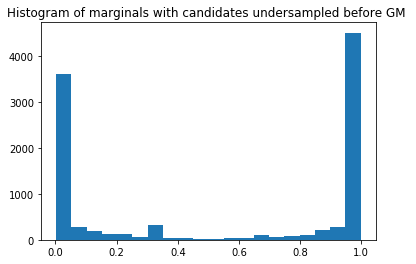




Model                                                       55
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.606061
Rec.                                                 -0.669729
F-1                                                   0.904934
#deps                                                       32
Name: 55, dtype: object
[GenerativeModel] Model <GenerativeModel_55> loaded.


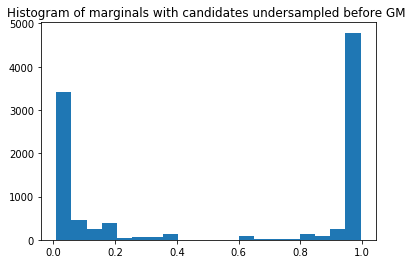




Model                                                       27
epochs                                                     300
step_size                                               0.0001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.561404
Rec.                                                 -0.666849
F-1                                                   0.841875
#deps                                                       34
Name: 27, dtype: object
[GenerativeModel] Model <GenerativeModel_27> loaded.


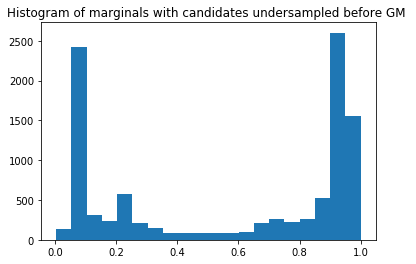




Model                                                        2
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.561404
Rec.                                                 -0.666849
F-1                                                   0.841875
#deps                                                       34
Name: 4, dtype: object
[GenerativeModel] Model <GenerativeModel_2> loaded.


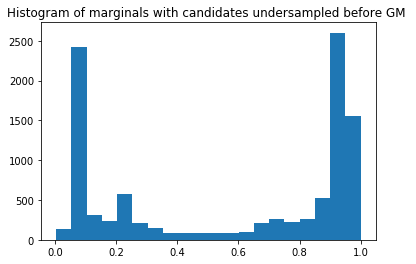




Model                                                        7
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.641611
Rec.                                                 -0.802252
F-1                                                   0.799762
#deps                                                       36
Name: 9, dtype: object
[GenerativeModel] Model <GenerativeModel_7> loaded.


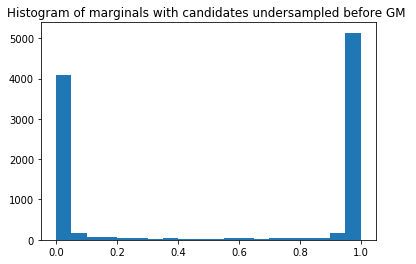




Model                                                       79
epochs                                                     300
step_size                                                0.001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.641611
Rec.                                                 -0.802252
F-1                                                   0.799762
#deps                                                       36
Name: 78, dtype: object
[GenerativeModel] Model <GenerativeModel_79> loaded.


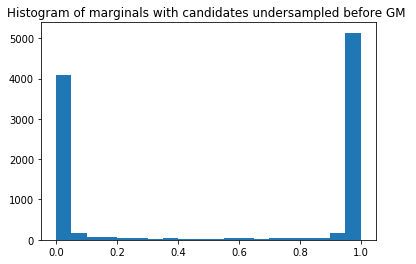




Model                                                       45
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.642424
Rec.                                                 -0.831592
F-1                                                   0.772524
#deps                                                       35
Name: 46, dtype: object
[GenerativeModel] Model <GenerativeModel_45> loaded.


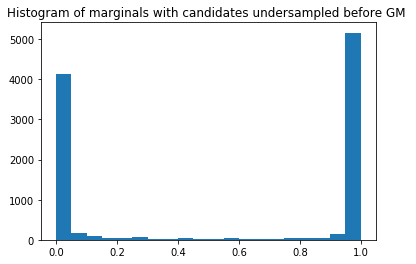




Model                                                       33
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.642424
Rec.                                                 -0.831592
F-1                                                   0.772524
#deps                                                       35
Name: 32, dtype: object
[GenerativeModel] Model <GenerativeModel_33> loaded.


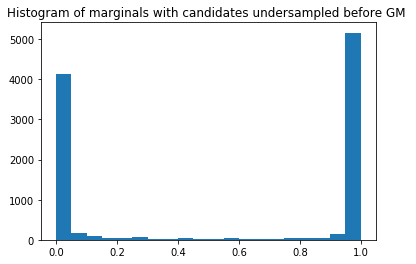




Model                                                       24
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.647887
Rec.                                                 -0.840571
F-1                                                   0.770771
#deps                                                       34
Name: 23, dtype: object
[GenerativeModel] Model <GenerativeModel_24> loaded.


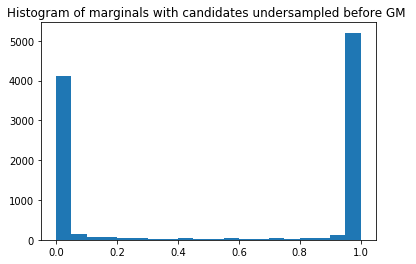




Model                                                       75
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.647887
Rec.                                                 -0.840571
F-1                                                   0.770771
#deps                                                       34
Name: 75, dtype: object
[GenerativeModel] Model <GenerativeModel_75> loaded.


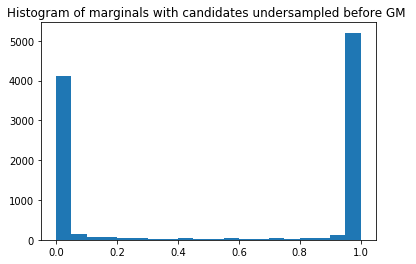




Model                                                        8
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.542312
Rec.                                                 -0.733211
F-1                                                   0.739641
#deps                                                       35
Name: 7, dtype: object
[GenerativeModel] Model <GenerativeModel_8> loaded.


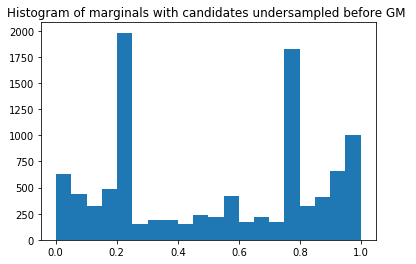




Model                                                       59
epochs                                                     300
step_size                                               0.0001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.542312
Rec.                                                 -0.733211
F-1                                                   0.739641
#deps                                                       35
Name: 59, dtype: object
[GenerativeModel] Model <GenerativeModel_59> loaded.


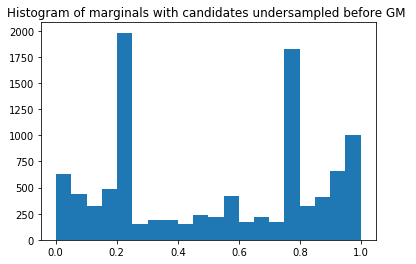




Model                                                        3
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.542312
Rec.                                                 -0.733211
F-1                                                   0.739641
#deps                                                       35
Name: 5, dtype: object
[GenerativeModel] Model <GenerativeModel_3> loaded.


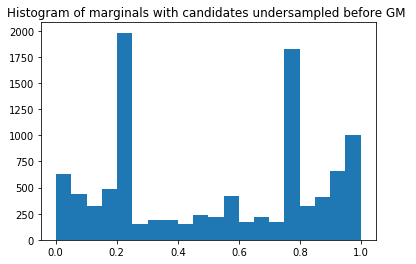




Model                                                       51
epochs                                                     300
step_size                                               0.0001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.542312
Rec.                                                 -0.733211
F-1                                                   0.739641
#deps                                                       35
Name: 52, dtype: object
[GenerativeModel] Model <GenerativeModel_51> loaded.


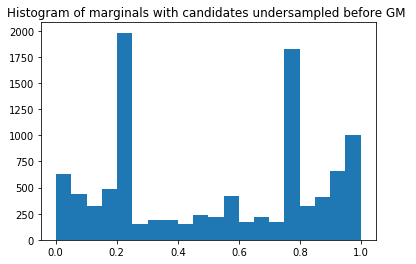




Model                                                       47
epochs                                                     300
step_size                                               0.0001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.542312
Rec.                                                 -0.733211
F-1                                                   0.739641
#deps                                                       35
Name: 47, dtype: object
[GenerativeModel] Model <GenerativeModel_47> loaded.


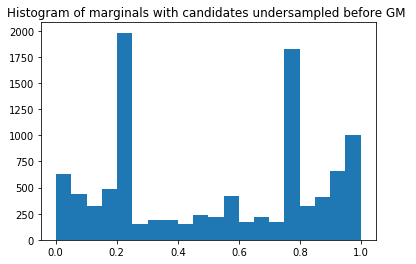




Model                                                       68
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.537786
Rec.                                                 -0.771068
F-1                                                   0.697456
#deps                                                       36
Name: 67, dtype: object
[GenerativeModel] Model <GenerativeModel_68> loaded.


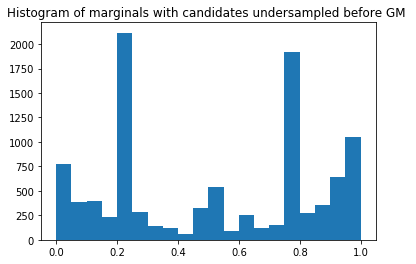




Model                                                       73
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.537786
Rec.                                                 -0.771068
F-1                                                   0.697456
#deps                                                       36
Name: 73, dtype: object
[GenerativeModel] Model <GenerativeModel_73> loaded.


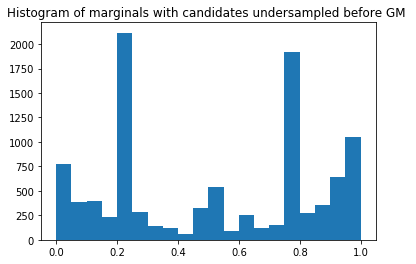




Model                                                       69
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.524986
Rec.                                                 -0.775834
F-1                                                   0.676674
#deps                                                       36
Name: 70, dtype: object
[GenerativeModel] Model <GenerativeModel_69> loaded.


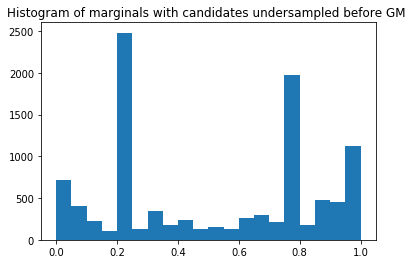




Model                                                        6
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                  0.52132
Rec.                                                 -0.887507
F-1                                                   0.587399
#deps                                                       41
Name: 0, dtype: object
[GenerativeModel] Model <GenerativeModel_6> loaded.


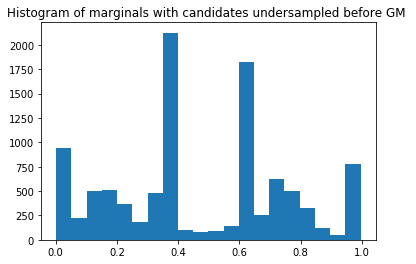




Model                                                       61
epochs                                                     300
step_size                                               0.0001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                  0.52132
Rec.                                                 -0.887507
F-1                                                   0.587399
#deps                                                       41
Name: 61, dtype: object
[GenerativeModel] Model <GenerativeModel_61> loaded.


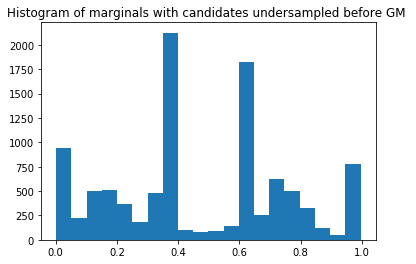




Model                                                       78
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                  0.52132
Rec.                                                 -0.887507
F-1                                                   0.587399
#deps                                                       41
Name: 79, dtype: object
[GenerativeModel] Model <GenerativeModel_78> loaded.


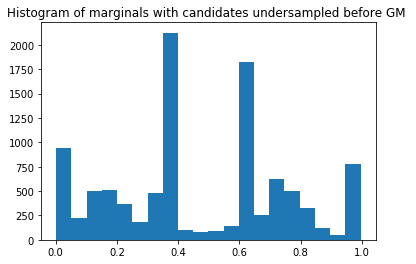




Model                                                       20
epochs                                                     300
step_size                                               0.0001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.503542
Rec.                                                  -0.89496
F-1                                                   0.562642
#deps                                                       46
Name: 20, dtype: object
[GenerativeModel] Model <GenerativeModel_20> loaded.


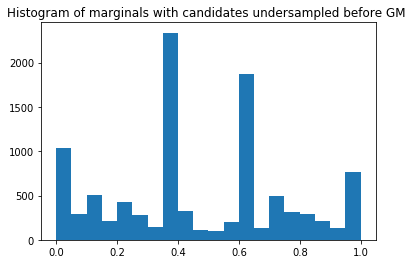




Model                                                       34
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.553787
Rec.                                                 -0.998287
F-1                                                   0.554738
#deps                                                       46
Name: 34, dtype: object
[GenerativeModel] Model <GenerativeModel_34> loaded.


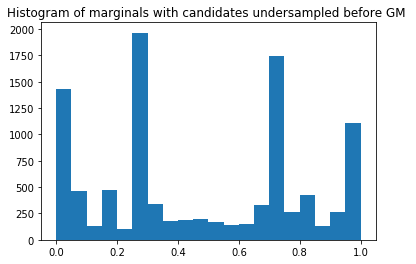




Model                                                        5
epochs                                                     300
step_size                                               0.0001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                      0.5
Rec.                                                  -0.96716
F-1                                                   0.516977
#deps                                                       51
Name: 6, dtype: object
[GenerativeModel] Model <GenerativeModel_5> loaded.


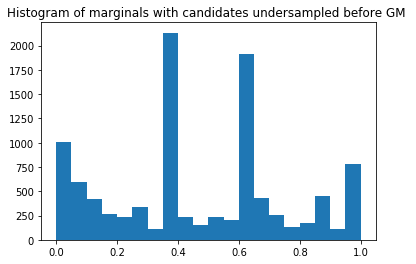




Model                                                       52
epochs                                                     300
step_size                                               0.0001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                      0.5
Rec.                                                  -0.96716
F-1                                                   0.516977
#deps                                                       51
Name: 54, dtype: object
[GenerativeModel] Model <GenerativeModel_52> loaded.


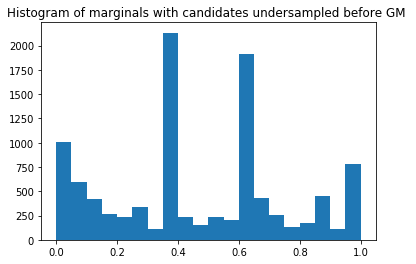




Model                                                       66
epochs                                                     300
step_size                                               0.0001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                      0.5
Rec.                                                  -0.96716
F-1                                                   0.516977
#deps                                                       51
Name: 68, dtype: object
[GenerativeModel] Model <GenerativeModel_66> loaded.


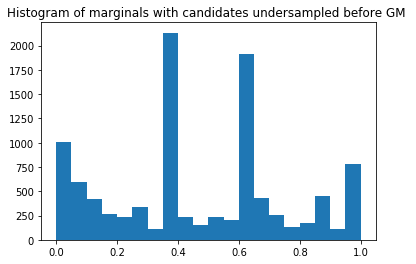




Model                                                       41
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.511206
Rec.                                                  -1.04394
F-1                                                   0.489687
#deps                                                       35
Name: 41, dtype: object
[GenerativeModel] Model <GenerativeModel_41> loaded.


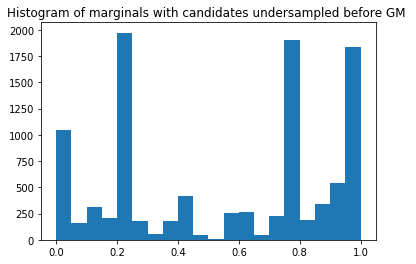




Model                                                       17
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.511206
Rec.                                                  -1.04394
F-1                                                   0.489687
#deps                                                       35
Name: 14, dtype: object
[GenerativeModel] Model <GenerativeModel_17> loaded.


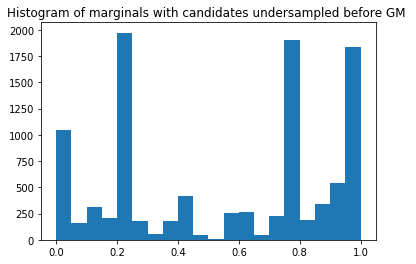




Model                                                       29
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                  0.54292
Rec.                                                  -1.17812
F-1                                                   0.460835
#deps                                                       41
Name: 31, dtype: object
[GenerativeModel] Model <GenerativeModel_29> loaded.


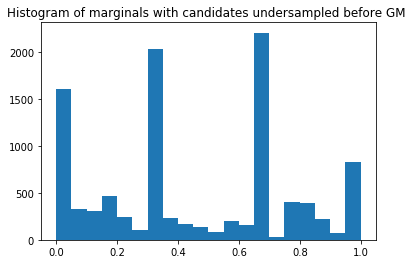




Model                                                       70
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                  0.54292
Rec.                                                  -1.17812
F-1                                                   0.460835
#deps                                                       41
Name: 69, dtype: object
[GenerativeModel] Model <GenerativeModel_70> loaded.


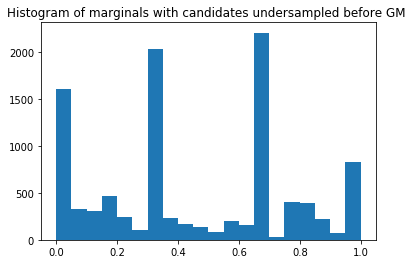




Model                                                        0
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                  0.47267
Rec.                                                  -1.17699
F-1                                                   0.401594
#deps                                                       36
Name: 3, dtype: object
[GenerativeModel] Model <GenerativeModel_0> loaded.


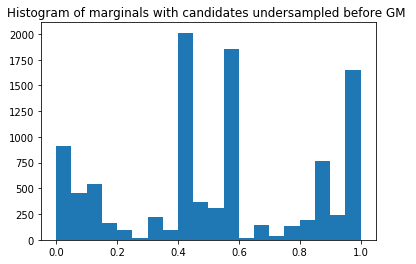




Model                                                       43
epochs                                                     300
step_size                                               0.0001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                  0.47267
Rec.                                                  -1.17699
F-1                                                   0.401594
#deps                                                       36
Name: 42, dtype: object
[GenerativeModel] Model <GenerativeModel_43> loaded.


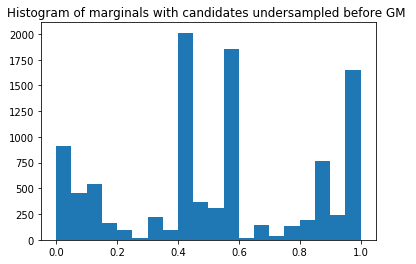




Model                                                       15
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.492364
Rec.                                                  -1.25475
F-1                                                     0.3924
#deps                                                       51
Name: 19, dtype: object
[GenerativeModel] Model <GenerativeModel_15> loaded.


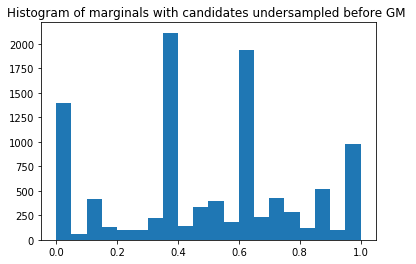




Model                                                       21
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.467314
Rec.                                                  -1.23905
F-1                                                   0.377156
#deps                                                       51
Name: 21, dtype: object
[GenerativeModel] Model <GenerativeModel_21> loaded.


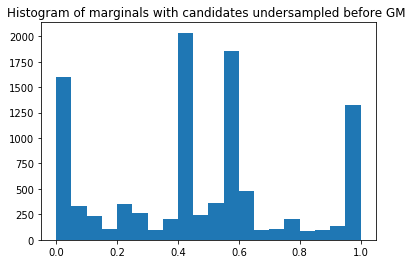




Model                                                       39
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.445748
Rec.                                                  -1.22805
F-1                                                   0.362973
#deps                                                       46
Name: 37, dtype: object
[GenerativeModel] Model <GenerativeModel_39> loaded.


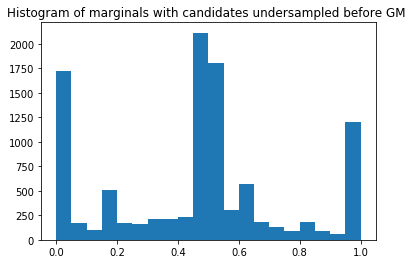




Model                                                       63
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.195799
Rec.                                                  -1.35538
F-1                                                    0.14446
#deps                                                       46
Name: 65, dtype: object
[GenerativeModel] Model <GenerativeModel_63> loaded.


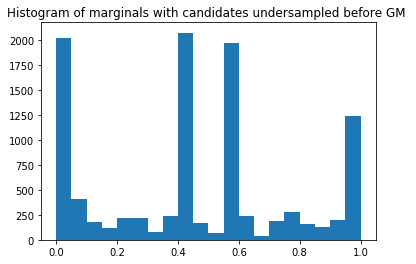




Model                                                       14
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.164602
Rec.                                                  -1.46429
F-1                                                   0.112411
#deps                                                       51
Name: 15, dtype: object
[GenerativeModel] Model <GenerativeModel_14> loaded.


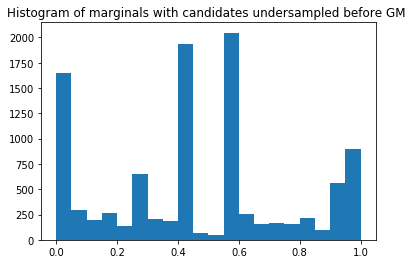




Model                                                       10
epochs                                                     300
step_size                                               0.0001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.164602
Rec.                                                  -1.46429
F-1                                                   0.112411
#deps                                                       51
Name: 8, dtype: object
[GenerativeModel] Model <GenerativeModel_10> loaded.


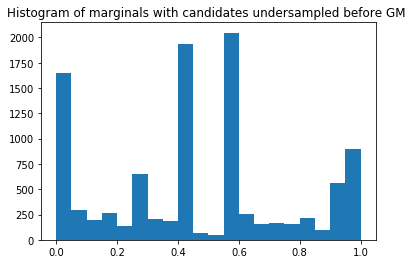




Model                                                       76
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.146234
Rec.                                                  -3.86921
F-1                                                  0.0377942
#deps                                                       41
Name: 77, dtype: object
[GenerativeModel] Model <GenerativeModel_76> loaded.


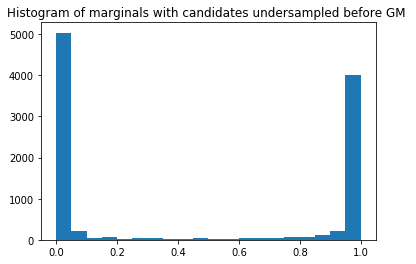




Model                                                       48
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.146234
Rec.                                                  -3.86921
F-1                                                  0.0377942
#deps                                                       41
Name: 48, dtype: object
[GenerativeModel] Model <GenerativeModel_48> loaded.


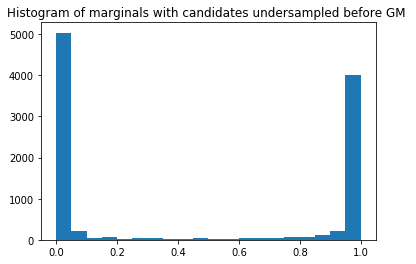




Model                                                       71
epochs                                                     300
step_size                                                0.001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.140935
Rec.                                                  -3.85896
F-1                                                  0.0365216
#deps                                                       30
Name: 71, dtype: object
[GenerativeModel] Model <GenerativeModel_71> loaded.


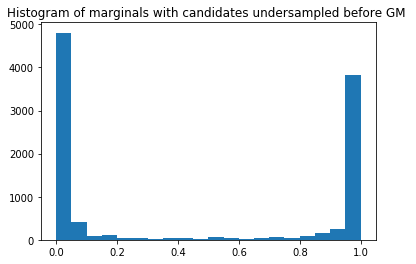




Model                                                       44
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.140935
Rec.                                                  -3.85896
F-1                                                  0.0365216
#deps                                                       30
Name: 44, dtype: object
[GenerativeModel] Model <GenerativeModel_44> loaded.


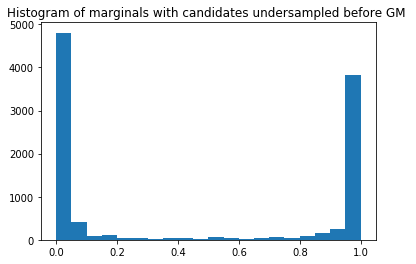




Model                                                       13
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.140935
Rec.                                                  -3.85896
F-1                                                  0.0365216
#deps                                                       30
Name: 13, dtype: object
[GenerativeModel] Model <GenerativeModel_13> loaded.


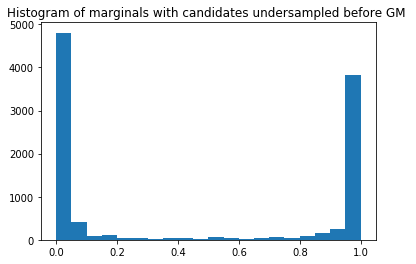




Model                                                       72
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.140935
Rec.                                                  -3.85896
F-1                                                  0.0365216
#deps                                                       30
Name: 72, dtype: object
[GenerativeModel] Model <GenerativeModel_72> loaded.


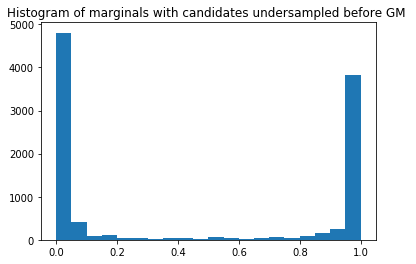




Model                                                       25
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.151828
Rec.                                                  -4.33102
F-1                                                  0.0350558
#deps                                                       41
Name: 26, dtype: object
[GenerativeModel] Model <GenerativeModel_25> loaded.


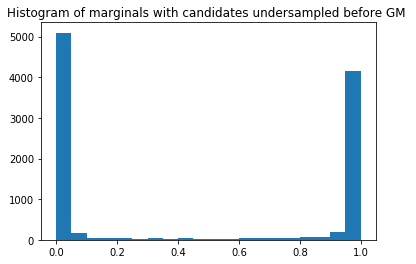




Model                                                       22
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.151828
Rec.                                                  -4.33102
F-1                                                  0.0350558
#deps                                                       41
Name: 22, dtype: object
[GenerativeModel] Model <GenerativeModel_22> loaded.


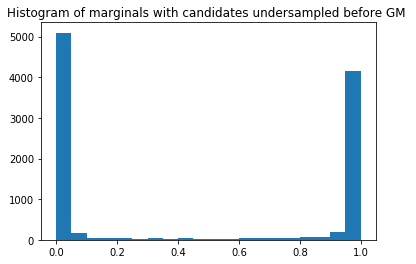




Model                                                       36
epochs                                                     300
step_size                                                 0.01
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.156125
Rec.                                                  -4.54281
F-1                                                  0.0343674
#deps                                                       51
Name: 40, dtype: object
[GenerativeModel] Model <GenerativeModel_36> loaded.


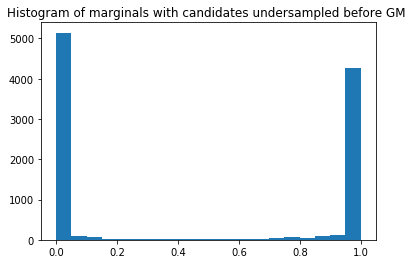




Model                                                       67
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.156125
Rec.                                                  -4.54281
F-1                                                  0.0343674
#deps                                                       51
Name: 66, dtype: object
[GenerativeModel] Model <GenerativeModel_67> loaded.


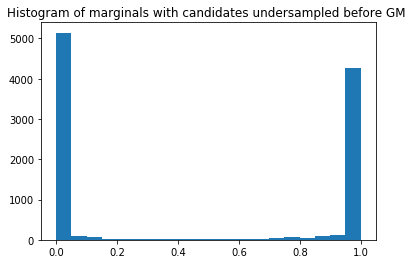




Model                                                       28
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                   0.1526
Rec.                                                  -4.54807
F-1                                                  0.0335528
#deps                                                       46
Name: 28, dtype: object
[GenerativeModel] Model <GenerativeModel_28> loaded.


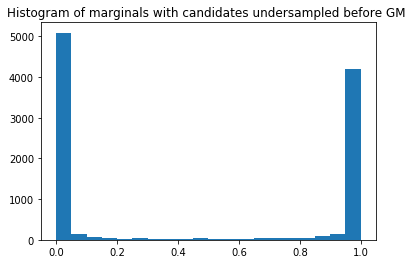




Model                                                       35
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                   0.1526
Rec.                                                  -4.54807
F-1                                                  0.0335528
#deps                                                       46
Name: 35, dtype: object
[GenerativeModel] Model <GenerativeModel_35> loaded.


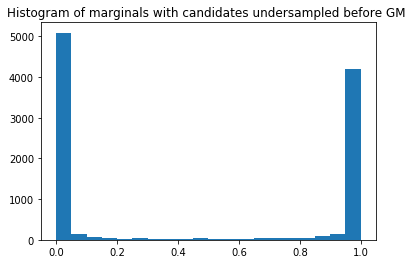




Model                                                       56
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                   0.1526
Rec.                                                  -4.54807
F-1                                                  0.0335528
#deps                                                       46
Name: 58, dtype: object
[GenerativeModel] Model <GenerativeModel_56> loaded.


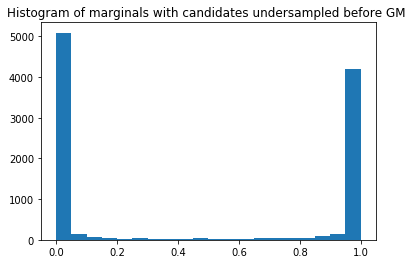




Model                                                       60
epochs                                                     300
step_size                                                 0.01
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                   0.1526
Rec.                                                  -4.54807
F-1                                                  0.0335528
#deps                                                       46
Name: 60, dtype: object
[GenerativeModel] Model <GenerativeModel_60> loaded.


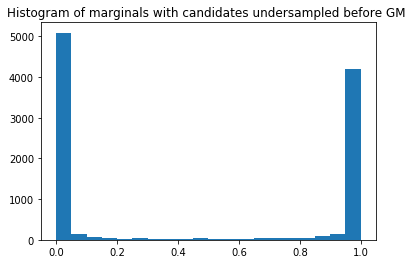




Model                                                       12
epochs                                                     300
step_size                                                 0.01
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                   0.1526
Rec.                                                  -4.54807
F-1                                                  0.0335528
#deps                                                       46
Name: 12, dtype: object
[GenerativeModel] Model <GenerativeModel_12> loaded.


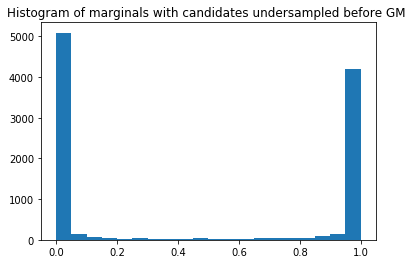




Model                                                       62
epochs                                                     300
step_size                                                0.001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                   0.1458
Rec.                                                   -4.5263
F-1                                                  0.0322118
#deps                                                       35
Name: 62, dtype: object
[GenerativeModel] Model <GenerativeModel_62> loaded.


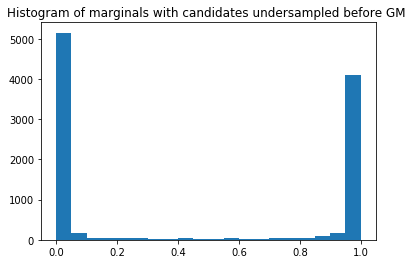




Model                                                       54
epochs                                                     300
step_size                                                0.001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                   0.1458
Rec.                                                   -4.5263
F-1                                                  0.0322118
#deps                                                       35
Name: 51, dtype: object
[GenerativeModel] Model <GenerativeModel_54> loaded.


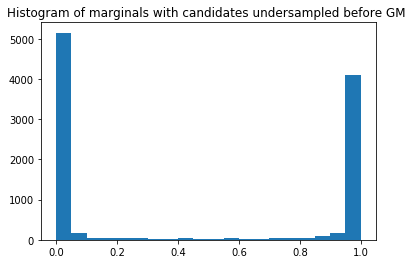




Model                                                       57
epochs                                                     300
step_size                                                0.001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                   0.1458
Rec.                                                   -4.5263
F-1                                                  0.0322118
#deps                                                       35
Name: 57, dtype: object
[GenerativeModel] Model <GenerativeModel_57> loaded.


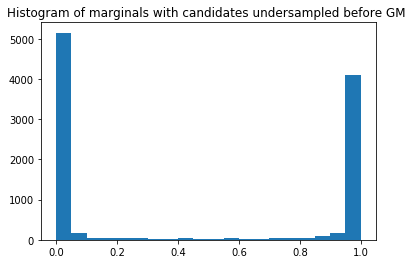




Model                                                       40
epochs                                                     300
step_size                                                0.001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                   0.1458
Rec.                                                   -4.5263
F-1                                                  0.0322118
#deps                                                       35
Name: 39, dtype: object
[GenerativeModel] Model <GenerativeModel_40> loaded.


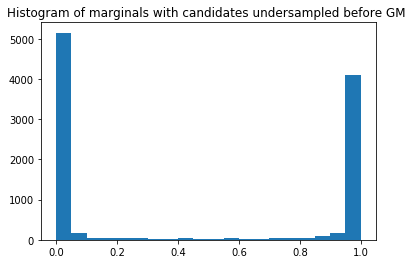




Model                                                       31
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.147961
Rec.                                                   -4.8073
F-1                                                  0.0307784
#deps                                                       35
Name: 33, dtype: object
[GenerativeModel] Model <GenerativeModel_31> loaded.


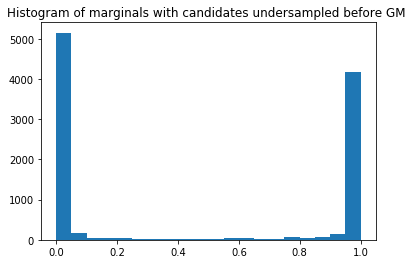




Model                                                       58
epochs                                                     300
step_size                                                 0.01
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.147961
Rec.                                                   -4.8073
F-1                                                  0.0307784
#deps                                                       35
Name: 56, dtype: object
[GenerativeModel] Model <GenerativeModel_58> loaded.


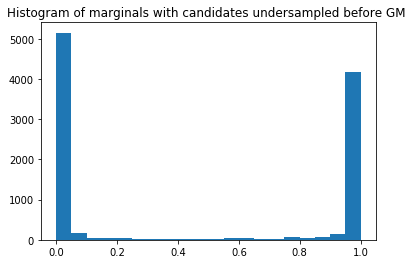




Model                                                       32
epochs                                                     300
step_size                                                0.001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.142403
Rec.                                                  -4.65382
F-1                                                  0.0305992
#deps                                                       34
Name: 30, dtype: object
[GenerativeModel] Model <GenerativeModel_32> loaded.


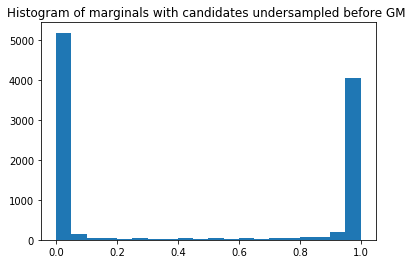




Model                                                       11
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.141767
Rec.                                                  -4.63443
F-1                                                    0.03059
#deps                                                       32
Name: 11, dtype: object
[GenerativeModel] Model <GenerativeModel_11> loaded.


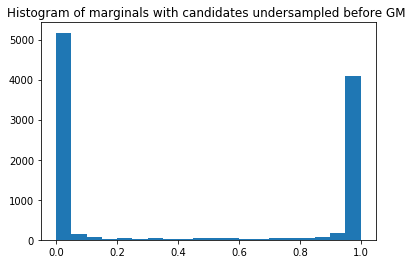




Model                                                        1
epochs                                                     300
step_size                                                0.001
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.141767
Rec.                                                  -4.63443
F-1                                                    0.03059
#deps                                                       32
Name: 2, dtype: object
[GenerativeModel] Model <GenerativeModel_1> loaded.


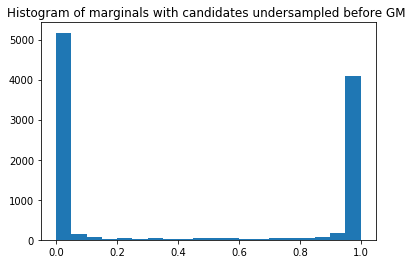




Model                                                        9
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.141767
Rec.                                                  -4.63443
F-1                                                    0.03059
#deps                                                       32
Name: 10, dtype: object
[GenerativeModel] Model <GenerativeModel_9> loaded.


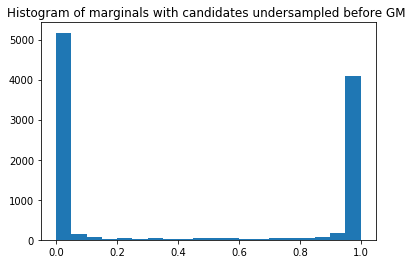




Model                                                       19
epochs                                                     300
step_size                                                0.001
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.143175
Rec.                                                  -4.70102
F-1                                                  0.0304562
#deps                                                       30
Name: 17, dtype: object
[GenerativeModel] Model <GenerativeModel_19> loaded.


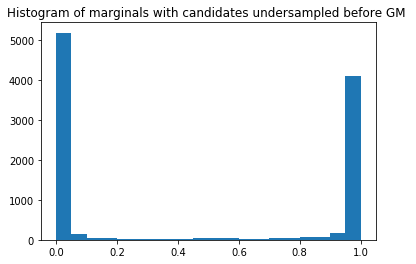




Model                                                       64
epochs                                                     300
step_size                                                 0.01
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.145212
Rec.                                                  -4.88491
F-1                                                  0.0297267
#deps                                                       30
Name: 63, dtype: object
[GenerativeModel] Model <GenerativeModel_64> loaded.


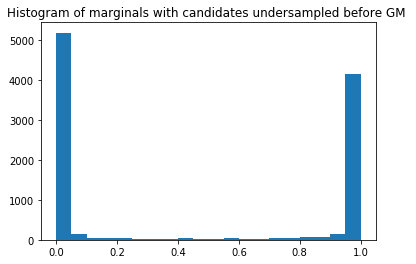




Model                                                       37
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.142448
Rec.                                                  -4.79349
F-1                                                   0.029717
#deps                                                       32
Name: 36, dtype: object
[GenerativeModel] Model <GenerativeModel_37> loaded.


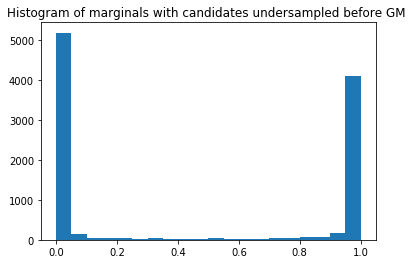




Model                                                       74
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.142448
Rec.                                                  -4.79349
F-1                                                   0.029717
#deps                                                       32
Name: 74, dtype: object
[GenerativeModel] Model <GenerativeModel_74> loaded.


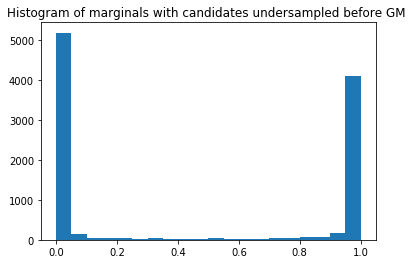




Model                                                       23
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.142448
Rec.                                                  -4.79349
F-1                                                   0.029717
#deps                                                       32
Name: 24, dtype: object
[GenerativeModel] Model <GenerativeModel_23> loaded.


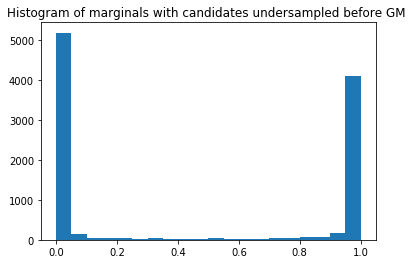




Model                                                        4
epochs                                                     300
step_size                                                 0.01
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.95
Prec.                                                 0.142448
Rec.                                                  -4.79349
F-1                                                   0.029717
#deps                                                       32
Name: 1, dtype: object
[GenerativeModel] Model <GenerativeModel_4> loaded.


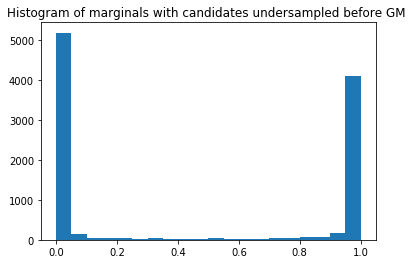




Model                                                       18
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-100
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.146249
Rec.                                                  -5.03382
F-1                                                  0.0290532
#deps                                                       32
Name: 18, dtype: object
[GenerativeModel] Model <GenerativeModel_18> loaded.


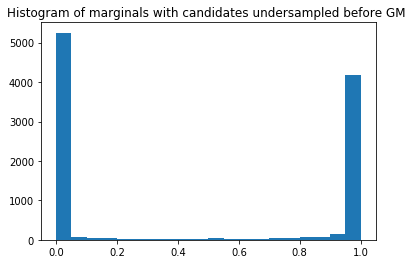




Model                                                       30
epochs                                                     300
step_size                                                 0.01
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.146249
Rec.                                                  -5.03382
F-1                                                  0.0290532
#deps                                                       32
Name: 29, dtype: object
[GenerativeModel] Model <GenerativeModel_30> loaded.


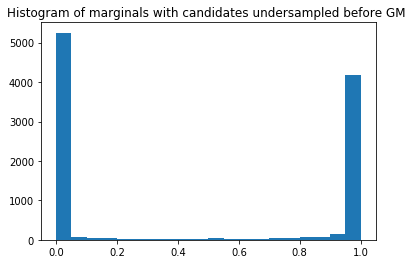




Model                                                       77
epochs                                                     300
step_size                                                 0.01
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.146249
Rec.                                                  -5.03382
F-1                                                  0.0290532
#deps                                                       32
Name: 76, dtype: object
[GenerativeModel] Model <GenerativeModel_77> loaded.


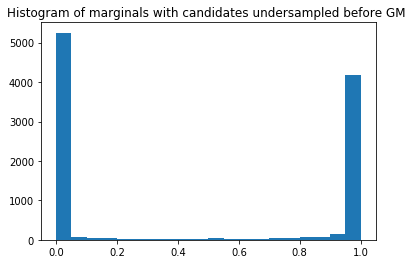




Model                                                       16
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.146249
Rec.                                                  -5.03382
F-1                                                  0.0290532
#deps                                                       32
Name: 16, dtype: object
[GenerativeModel] Model <GenerativeModel_16> loaded.


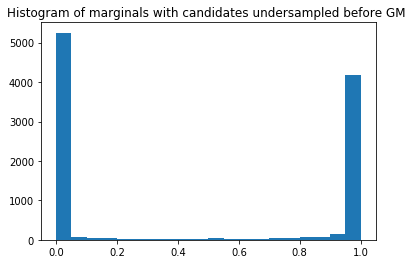




Model                                                       46
epochs                                                     300
step_size                                                 0.01
reg_param                                               1e-200
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.143583
Rec.                                                  -5.05275
F-1                                                  0.0284168
#deps                                                       34
Name: 45, dtype: object
[GenerativeModel] Model <GenerativeModel_46> loaded.


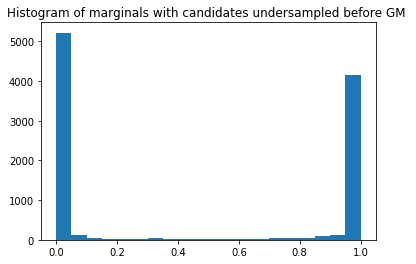




Model                                                       49
epochs                                                     300
step_size                                                 0.01
reg_param                                                1e-50
deps         {(4, 7, 0), (6, 9, 0), (1, 10, 0), (3, 9, 0), ...
decay                                                     0.99
Prec.                                                 0.143583
Rec.                                                  -5.05275
F-1                                                  0.0284168
#deps                                                       34
Name: 49, dtype: object
[GenerativeModel] Model <GenerativeModel_49> loaded.


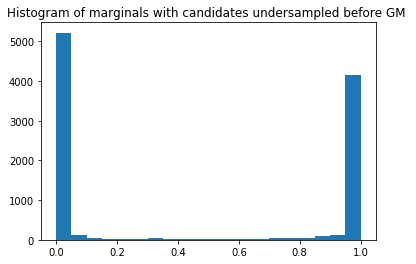

In [352]:
for idx in run_stats.index:
    print run_stats.loc[idx]
    gen_model.load('GenerativeModel_%i'%run_stats.loc[idx,'Model'], save_dir='checkpoints/grid_search/')
    train_marginals_us = gen_model.marginals(L_train_us)
    plt.hist(train_marginals_us, bins=20)
    plt.title('Histogram of marginals with candidates undersampled before GM ')
    plt.show()
    print '\n\n'

In [353]:
# pick model 8

In [354]:

gen_model.load('GenerativeModel_8', save_dir='checkpoints/grid_search/')
unlab_marginals_us = gen_model.marginals(L_train_us)

[GenerativeModel] Model <GenerativeModel_8> loaded.


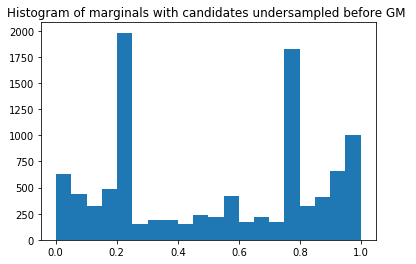

In [355]:
plt.hist(train_marginals_us, bins=20)
plt.title('Histogram of marginals with candidates undersampled before GM ')
plt.show()

In [356]:
_ = gen_model.error_analysis(session, L_dev, L_gold_dev)

Scores (Un-adjusted)
Pos. class accuracy: 0.645
Neg. class accuracy: 0.795
Precision            0.468
Recall               0.645
F1                   0.542
----------------------------------------
TP: 455 | FP: 518 | TN: 2007 | FN: 250



In [359]:
L_train_us

<10208x12 sparse matrix of type '<type 'numpy.int64'>'
	with 122496 stored elements in Compressed Sparse Row format>

In [358]:
save_marginals(session, L_train, train_marginals_us)

Saved 10208 marginals


# Discriminative model learning

In [378]:
from snorkel.learning import reRNN

In [387]:
L_gold_test = load_gold_labels(session, annotator_name='gold', split=2)
L_gold_test

<8335x1 sparse matrix of type '<type 'numpy.int64'>'
	with 8335 stored elements in Compressed Sparse Row format>

** Without GS **

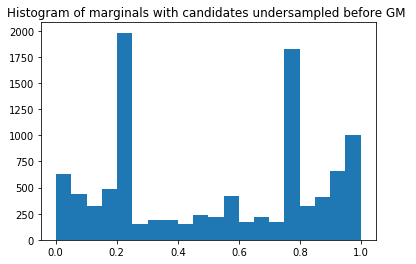

In [389]:
plt.hist(train_marginals_us, bins=20)
plt.title('Histogram of marginals with candidates undersampled before GM ')
plt.show()

In [384]:
train_kwargs = {
    'lr':         0.01,
    'dim':        100,
    'n_epochs':   20,
    'dropout':    0.5,
    'rebalance':  True,
    'print_freq': 1,
    'batch_size': 64
}

lstm = reRNN(seed=1701, n_threads=6,)
lstm.train(unlab_us, unlab_marginals_us , X_dev=dev, Y_dev=L_gold_dev, **train_kwargs)

/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=9552  #epochs=20  batch size=64
[reRNN] Epoch 0 (52.83s)	Average loss=0.694253	Dev F1=31.66
[reRNN] Epoch 1 (110.47s)	Average loss=0.687902	Dev F1=32.00
[reRNN] Epoch 2 (166.26s)	Average loss=0.646877	Dev F1=33.53
[reRNN] Epoch 3 (224.80s)	Average loss=0.603902	Dev F1=28.32
[reRNN] Epoch 4 (282.38s)	Average loss=0.579879	Dev F1=31.20
[reRNN] Epoch 5 (339.29s)	Average loss=0.559674	Dev F1=30.68
[reRNN] Epoch 6 (397.28s)	Average loss=0.550173	Dev F1=31.55
[reRNN] Epoch 7 (454.93s)	Average loss=0.540777	Dev F1=31.65
[reRNN] Epoch 8 (511.07s)	Average loss=0.535132	Dev F1=32.26
[reRNN] Epoch 9 (567.37s)	Average loss=0.530006	Dev F1=30.92
[reRNN] Epoch 10 (624.83s)	Average loss=0.526469	Dev F1=31.58
[reRNN] Epoch 11 (682.48s)	Average loss=0.524086	Dev F1=32.09
[reRNN] Epoch 12 (740.15s)	Average loss=0.523114	Dev F1=32.10
[reRNN] Epoch 13 (797.64s)	Average loss=0.520714	Dev F1=29.48
[reRNN] Epoch 14 (857.29s)	Average loss=0.520527	Dev F1=31.23
[reRNN] Ep

In [385]:
tp, fp, tn, fn = lstm.error_analysis(session, dev, L_gold_dev)

Scores (Un-adjusted)
Pos. class accuracy: 0.555
Neg. class accuracy: 0.476
Precision            0.228
Recall               0.555
F1                   0.323
----------------------------------------
TP: 391 | FP: 1323 | TN: 1202 | FN: 314



In [388]:
tp, fp, tn, fn = lstm.error_analysis(session, test, L_gold_test)

Scores (Un-adjusted)
Pos. class accuracy: 0.513
Neg. class accuracy: 0.49
Precision            0.24
Recall               0.513
F1                   0.327
----------------------------------------
TP: 1020 | FP: 3235 | TN: 3113 | FN: 967



** With GS ** 

In [397]:
from snorkel.annotations import load_marginals
train_labels = np.array([0 if train[x].gold_labels[0].value ==-1 else 1 for x in range(len(train))]) # load train labels to mix in LSTM
unlab_marginals = load_marginals(session, split=3)


In [398]:
train_us, train_labels_us = balance_candidates(train,train_labels)

In [399]:
train_unlab_marginals = np.append(train_labels_us, unlab_marginals_us)

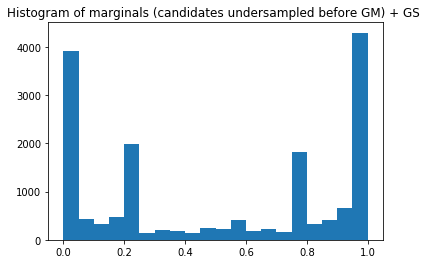

In [400]:
plt.hist(train_unlab_marginals, bins=20)
plt.title('Histogram of marginals (candidates undersampled before GM) + GS ')
plt.show()

In [401]:
train_kwargs = {
    'lr':         0.01,
    'dim':        100,
    'n_epochs':   25,
    'dropout':    0.5,
    'rebalance':  False,
    'print_freq': 1,
    'batch_size': 64
}

lstm = reRNN(seed=1701, n_threads=6)
lstm.train(train_us+unlab_us, train_unlab_marginals, X_dev=dev, Y_dev=L_gold_dev, **train_kwargs)


/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[reRNN] Training model
[reRNN] n_train=16812  #epochs=25  batch size=64
[reRNN] Epoch 0 (88.69s)	Average loss=0.670389	Dev F1=39.58
[reRNN] Epoch 1 (184.20s)	Average loss=0.574475	Dev F1=38.89
[reRNN] Epoch 2 (275.40s)	Average loss=0.505027	Dev F1=39.16
[reRNN] Epoch 3 (366.70s)	Average loss=0.466436	Dev F1=37.59
[reRNN] Epoch 4 (454.71s)	Average loss=0.441739	Dev F1=38.47
[reRNN] Epoch 5 (542.95s)	Average loss=0.426697	Dev F1=38.74
[reRNN] Epoch 6 (634.96s)	Average loss=0.411845	Dev F1=39.47
[reRNN] Epoch 7 (728.01s)	Average loss=0.409247	Dev F1=38.63
[reRNN] Epoch 8 (819.16s)	Average loss=0.399574	Dev F1=37.49
[reRNN] Epoch 9 (908.25s)	Average loss=0.390756	Dev F1=37.85
[reRNN] Epoch 10 (997.79s)	Average loss=0.384978	Dev F1=38.67
[reRNN] Epoch 11 (1092.79s)	Average loss=0.378557	Dev F1=39.58
[reRNN] Epoch 12 (1187.15s)	Average loss=0.373485	Dev F1=39.83
[reRNN] Epoch 13 (1281.62s)	Average loss=0.368622	Dev F1=39.33
[reRNN] Epoch 14 (1375.18s)	Average loss=0.367330	Dev F1=38.88
[reRN

In [402]:
tp, fp, tn, fn = lstm.error_analysis(session, dev, L_gold_dev)

Scores (Un-adjusted)
Pos. class accuracy: 0.618
Neg. class accuracy: 0.578
Precision            0.29
Recall               0.618
F1                   0.395
----------------------------------------
TP: 436 | FP: 1066 | TN: 1459 | FN: 269



In [403]:
tp, fp, tn, fn = lstm.error_analysis(session, test, L_gold_test)

Scores (Un-adjusted)
Pos. class accuracy: 0.639
Neg. class accuracy: 0.542
Precision            0.304
Recall               0.639
F1                   0.412
----------------------------------------
TP: 1269 | FP: 2909 | TN: 3439 | FN: 718



# ~~~~

# Try with linear weighting

** Majority Voting **

In [38]:
linear_gen_model = GenerativeModelLinear()

In [26]:
marginals_maj_vote = linear_gen_model.marginals(L_train, majority_voting=True)

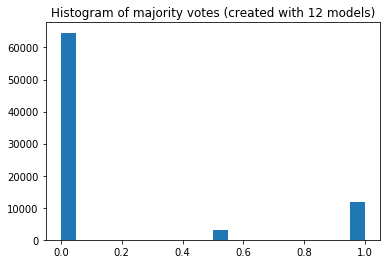

In [29]:
plt.hist(marginals_maj_vote, bins=20)
plt.title('Histogram of majority votes (created with %i models)'%L_train.shape[1])
plt.show()

In [44]:
save_marginals(session, L_train, marginals_maj_vote)

Saved 79400 marginals


In [69]:
from snorkel.learning import  GenerativeModel, RandomSearch

** No weighting **

In [39]:
marginals_linear_comb = linear_gen_model.marginals(L_train, lf_weights=1)

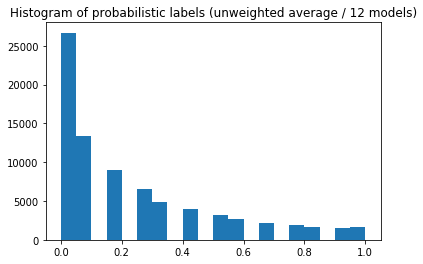

In [41]:
plt.hist(marginals_linear_comb, bins=20)
plt.title('Histogram of probabilistic labels (unweighted average / %i models)'%L_train.shape[1])
plt.show()

In [42]:
save_marginals(session, L_train, marginals_linear_comb)

Saved 79400 marginals


** Weighting proportional to F1 score **

In [43]:
results_dict.keys()

['results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear',
 'results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear',
 'RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM',
 'fasttext_fasttext',
 'results_dict,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(0, 3),LSA100_NeuralNet(10,10)',
 'results_dict,lemmas,RuS,CV_,bin_,minFreq=1,_ngrams=(1, 1),LSA100_LogisticRegression',
 'results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_RandomForestClassifier',
 'results_dict,trim=5,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(0, 3),LSA100_SVC_linear',
 'results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier',
 'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_LogisticRegression',
 'results_dict,ShortDepPath,RuS,TfIdf_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear',
 'results_dict,lemmas,RuS,TfIdf_,minFreq=1,_stopw=english,_ngr

In [55]:
lf_weights= []
for model_name in results_dict.keys():
    lf_weights.append(results_dict[model_name]['f1+'])
lf_weights = np.array(lf_weights)

In [67]:
linear_gen_model = GenerativeModelLinear()

In [68]:
marginals_linear_comb = linear_gen_model.marginals(L_train, lf_weights=lf_weights)

In [69]:
marginals_linear_comb

array([ 0.26232784,  0.26232784,  0.44517216, ...,  0.26566118,
        0.50399451,  0.49267216])

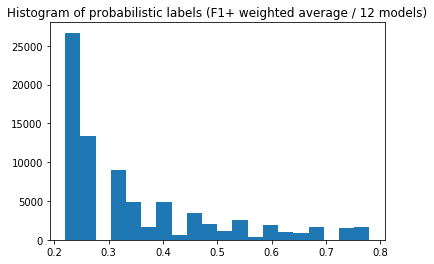

In [71]:
plt.hist(marginals_linear_comb, bins=20)
plt.title('Histogram of probabilistic labels (F1+ weighted average / %i models)'%L_train.shape[1])
plt.show()

In [72]:
save_marginals(session, L_train, marginals_linear_comb)

Saved 79400 marginals


In [28]:
# lf_weights = np.array([2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0])

# #if not given lf_weights = np.ones(L_train.shape[1])

# L_weighted = L_train.multiply(lf_weights)/lf_weights.sum()

In [80]:
item = L_train.mean(axis=1)[0]

In [81]:
item

matrix([[-0.83333333]])

# GM training (normal - snorkels way)

In [53]:
# %%time
# ### Normal training

# # actual training of the gen. model
# from snorkel.learning import GenerativeModel

# gen_model = GenerativeModel(lf_propensity=False, class_prior=True )
# gen_model.train(
#     L_train, decay=0.95, step_size=0.1/L_train.shape[0], reg_param=1e-6,  threads = 6,
#     deps=deps,
# )

# train_marginals = gen_model.marginals(L_train)

Inferred cardinality: 2
CPU times: user 2min 17s, sys: 141 ms, total: 2min 18s
Wall time: 1min 30s


4

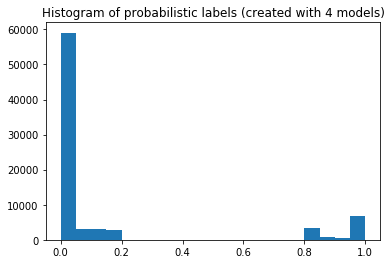

In [45]:
plt.hist(train_marginals, bins=20)
plt.title('Histogram of probabilistic labels (created with %i models)'%L_train.shape[1])
plt.show()

In [54]:
n_models = len(results_dict.keys())

In [55]:
from MLutils import diversity_matrix

In [56]:
diversity_matrix(results_dict,metric=accuracy_score).mean().mean()

0.80003869969040242

In [57]:
diversity_matrix(results_dict,metric=cohen_kappa_score).mean().mean()

0.5113189606834152

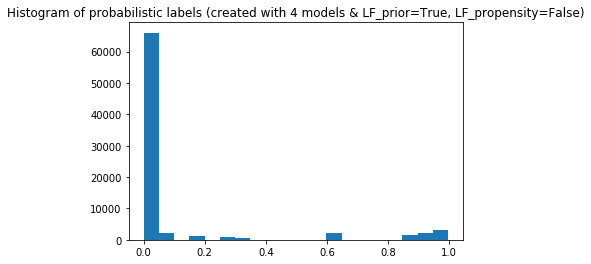

In [58]:
plt.hist(train_marginals, bins=20)
plt.title('Histogram of probabilistic labels (created with %i models & LF_prior=True, LF_propensity=False)'%n_models)
plt.show()

In [59]:
len(train_marginalsinals)

79400

In [60]:
print 'Inferred performance metrics by snorkel:'
gen_model.learned_lf_stats()

Inferred performance metrics by snorkel:


,Accuracy,Coverage,Precision,Recall
0,0.971729,0.8737,0.797044,0.820487
1,0.937507,0.8369,0.629160,0.805274
2,0.925276,0.8324,0.575373,0.781947
3,0.895110,0.8037,0.492881,0.737323


## Check performance on developer set

In [62]:
# TODO: to do that, we need to also take labels from a different dictionary

In [63]:
gen_model.learned_lf_stats()

,Accuracy,Coverage,Precision,Recall
0,0.968743,0.8734,0.800826,0.850746
1,0.941741,0.8342,0.671815,0.763828
2,0.926562,0.8211,0.618130,0.760316
3,0.897070,0.8054,0.529931,0.738367


In [68]:
gen_model.weights.lf_accuracy

array([ 1.32927991,  0.96930229,  0.89196357,  0.71774052])

In [71]:
gen_model.score(L_dev,L_gold_dev)

(0.67838312829525482, 0.54751773049645391, 0.60596546310832033)

In [55]:
np.exp(-8*((.81+.79+.75+.73)/4)**2)

0.0087107272118617431

In [82]:
L_dev.lf_stats(session, L_gold_dev,)

,j,Coverage,Overlaps,Conflicts,TP,FP,FN,TN,Empirical Acc.
fasttext_fasttext,0,1.0,1.0,0.486687,324,225,381,2300,0.812384
"results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear",1,1.0,1.0,0.486687,508,459,197,2066,0.796904
"RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM",2,1.0,1.0,0.486687,446,519,259,2006,0.759133
"results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier",3,1.0,1.0,0.486687,520,658,185,1867,0.739009


In [72]:
learned_stats = L_dev.lf_stats(session, L_gold_dev, gen_model.learned_lf_stats()['Accuracy'])
learned_stats

,j,Coverage,Overlaps,Conflicts,TP,FP,FN,TN,Empirical Acc.,Learned Acc.
fasttext_fasttext,0,1.0,1.0,0.486687,324,225,381,2300,0.812384,0.968112
"results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear",1,1.0,1.0,0.486687,508,459,197,2066,0.796904,0.935136
"RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM",2,1.0,1.0,0.486687,446,519,259,2006,0.759133,0.924378
"results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier",3,1.0,1.0,0.486687,520,658,185,1867,0.739009,0.896389


### Try with priors = F1 score

In [87]:
gen_model_prior = GenerativeModel()

In [88]:
gen_model_prior.train(L_train, LF_acc_prior_weights=[0.5167, 0.60765, 0.5341, 0.5523 ])

Inferred cardinality: 2


In [83]:
# to pass priors as F1 score
from sklearn.metrics import f1_score

for row in learned_stats.iterrows():
    print row[0]
    tp = row[1]['TP']
    tn = row[1]['TN']
    fp = row[1]['FP']
    fn = row[1]['FN']
    pr = float(tp)/(tp+fp)
    rec = float(tp)/(tp+fn)
    f1 = (2*pr*rec)/(pr+rec)
    print f1

fasttext_fasttext
0.516746411483
results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear
0.607655502392
RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM
0.534131736527
results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier
0.552310143388


In [260]:
# # export to latex
# print learned_stats.drop(labels=['j','Coverage', 'Overlaps', 'Conflicts'], axis=1).reset_index(drop=True).to_latex()

### Put it in a log

In [157]:
gen_model_prior_log = GenerativeModel()

In [158]:
# TODO: try this from  snorkel/test/learning/test_supervised.py


LF_acc_priors = [0.5167, 0.60765, 0.5341, 0.5523 ]
cardinality = 2
LF_acc_prior_weights = [0.5 * np.log((cardinality - 1.0) * x / (1 - x)) for x in LF_acc_priors]


In [159]:
LF_acc_prior_weights

[0.033412428221050325,
 0.2187223798716636,
 0.068306034261486848,
 0.10498400583011107]

In [160]:
gen_model_prior_log.train(L_train, LF_acc_prior_weights=LF_acc_prior_weights)

Inferred cardinality: 2


### Compare results

In [161]:
gen_model_prior_log.learned_lf_stats()

,Accuracy,Coverage,Precision,Recall
0,0.936173,0.8006,0.938447,0.750098
1,0.901056,0.7671,0.906266,0.700312
2,0.871032,0.7498,0.874868,0.648380
3,0.837408,0.7362,0.844474,0.619094


In [90]:
gen_model_prior.learned_lf_stats()

,Accuracy,Coverage,Precision,Recall
0,0.953406,0.8220,0.956984,0.789125
1,0.909594,0.7776,0.912752,0.715650
2,0.895702,0.7632,0.899871,0.681349
3,0.853391,0.7462,0.861635,0.640811


In [89]:
gen_model.learned_lf_stats() # before passing LF_acc_prior_weights

,Accuracy,Coverage,Precision,Recall
0,0.971318,0.8751,0.760460,0.838524
1,0.940309,0.8410,0.599103,0.770473
2,0.929846,0.8239,0.554054,0.756632
3,0.896266,0.8088,0.449892,0.719723


In [257]:
gen_model.learned_lf_stats()

,Accuracy,Coverage,Precision,Recall
0,0.943857,0.8033,0.150659,0.776699
1,0.913150,0.7749,0.099050,0.708738
2,0.928156,0.7906,0.118565,0.737864
3,0.917995,0.7841,0.103546,0.708738


In [179]:
L_train

(79400, 4)

In [177]:
L_train.row_index

{0: 40197,
 1: 40198,
 2: 40199,
 3: 40200,
 4: 40201,
 5: 40202,
 6: 40203,
 7: 40204,
 8: 40205,
 9: 40206,
 10: 40207,
 11: 40208,
 12: 40209,
 13: 40210,
 14: 40211,
 15: 40212,
 16: 40213,
 17: 40214,
 18: 40215,
 19: 40216,
 20: 40217,
 21: 40218,
 22: 40219,
 23: 40220,
 24: 40221,
 25: 40222,
 26: 40223,
 27: 40224,
 28: 40225,
 29: 40226,
 30: 40227,
 31: 40228,
 32: 40229,
 33: 40230,
 34: 40231,
 35: 40232,
 36: 40233,
 37: 40234,
 38: 40235,
 39: 40236,
 40: 40237,
 41: 40238,
 42: 40239,
 43: 40240,
 44: 40241,
 45: 40242,
 46: 40243,
 47: 40244,
 48: 40245,
 49: 40246,
 50: 40247,
 51: 40248,
 52: 40249,
 53: 40250,
 54: 40251,
 55: 40252,
 56: 40253,
 57: 40254,
 58: 40255,
 59: 40256,
 60: 40257,
 61: 40258,
 62: 40259,
 63: 40260,
 64: 40261,
 65: 40262,
 66: 40263,
 67: 40264,
 68: 40265,
 69: 40266,
 70: 40267,
 71: 40268,
 72: 40269,
 73: 40270,
 74: 40271,
 75: 40272,
 76: 40273,
 77: 40274,
 78: 40275,
 79: 40276,
 80: 40277,
 81: 40278,
 82: 40279,
 83: 40280,
 8

### Get and plot marginals

In [91]:
train_marginals_w_prior = gen_model_prior.marginals(L_train)

In [162]:
train_marginals_w_prior_log = gen_model_prior_log.marginals(L_train)

In [ ]:
# Plug in directly the F1 score as Lf_accuracy

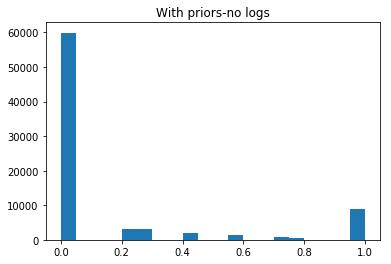

In [167]:
plt.hist(train_marginals_w_prior, bins=20)
plt.title('With priors-no logs')
plt.show()

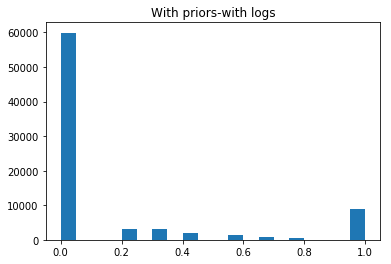

In [168]:
plt.hist(train_marginals_w_prior_log, bins=20)
plt.title('With priors-with logs')
plt.show()

In [180]:
L_train

<79400x4 sparse matrix of type '<type 'numpy.int64'>'
	with 317600 stored elements in Compressed Sparse Row format>

### Undersample dataset using the generative model

In [182]:
from MLutils import balance_candidates
from utils import delete_from_csr

In [372]:
arr = np.fromiter(map(lambda x:x[0].item()>=0.5,L_train.mean(axis=1)), dtype=bool)
lbls = arr*2-1
indices = [i for i in range(L_train.shape[0])]
ind_us, lbls_us = balance_candidates(indices, lbls)
unlab_us = [unlab[i] for i in ind_us]

In [209]:
ind_to_del = list(set(indices).difference(set(ind_us)))

# ~

In [163]:
gen_model.weights.lf_accuracy

array([ 0.5167 ,  0.60765,  0.5341 ,  0.5523 ])

In [99]:
np.array([0.5167, 0.60765, 0.5341, 0.5523 ])

array([ 0.5167 ,  0.60765,  0.5341 ,  0.5523 ])

In [100]:
gen_model.weights.lf_accuracy = np.array([0.5167, 0.60765, 0.5341, 0.5523 ])

In [101]:
train_marginals_F1 = gen_model.marginals(L_train)

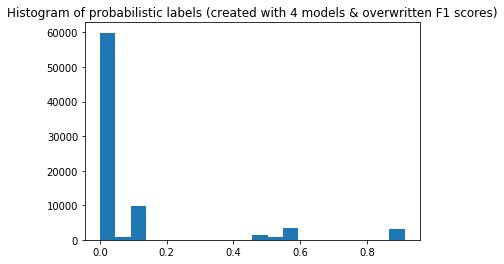

In [134]:
plt.hist(train_marginals_F1, bins=20)
plt.title('Histogram of probabilistic labels (created with %i models & overwritten F1 scores)'%n_models)
plt.show()

In [254]:
L_dev.lf_stats(session, L_gold_dev, gen_model.learned_lf_stats()['Accuracy'])

,j,Coverage,Overlaps,Conflicts,TP,FP,FN,TN,Empirical Acc.,Learned Acc.
fasttext_fasttext,0,1.0,1.0,0.486687,324,225,381,2300,0.812384,0.940637
"results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear",1,1.0,1.0,0.486687,508,459,197,2066,0.796904,0.910915
"RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM",2,1.0,1.0,0.486687,446,519,259,2006,0.759133,0.922221
"results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier",3,1.0,1.0,0.486687,520,658,185,1867,0.739009,0.918230


Text(0.5,1,'Unweighted voting for 12 classifiers')

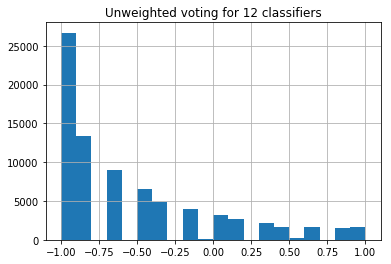

In [91]:
#this would be with unweighted voting

pd.Series(list(map(lambda x:x[0].item(),L_train.mean(axis=1)))).hist(bins=20)
plt.title('Unweighted voting for 12 classifiers')

In [136]:
import math
import numpy as np
import scipy.sparse as sparse
from multiprocessing import Process, Queue
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from snorkel.models import FeatureKey, GoldLabel, Sentence, Span, Candidate
from snorkel.learning.utils import print_scores

def majority_vote(L):
    '''Majority vote'''
    pred = L.sum(axis=1)
    pred[(pred > 0).nonzero()[0]] = 1
    pred[(pred < 0).nonzero()[0]] = 0
    return pred

def majority_vote_score(L, gold_labels):
    
    y_pred = np.ravel(majority_vote(L))
    y_true = gold_labels.todense()
    y_true = [1 if y_true[i] == 1 else 0 for i in range(y_true.shape[0])]
    
    pos,neg = y_true.count(1),float(y_true.count(0))
    print "pos/neg    {:d}:{:d} {:.1f}%/{:.1f}%".format(int(pos), int(neg), pos/(pos+neg)*100, neg/(pos+neg)*100)
    print "precision  {:.2f}".format( 100 * precision_score(y_true, y_pred) )
    print "recall     {:.2f}".format( 100 * recall_score(y_true, y_pred) )
    print "f1         {:.2f}".format( 100 * f1_score(y_true, y_pred) )
    #print "accuracy  {:.2f}".format( 100 * accuracy_score(y_true, y_pred) 


In [137]:
majority_vote_score(L_dev, L_gold_dev)

pos/neg    705:2525 21.8%/78.2%
precision  67.84
recall     54.75
f1         60.60


In [ ]:
# 

In [138]:
L_dev.

<1x4 sparse matrix of type '<type 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [142]:
l_i = L_dev[0].tocoo()

In [143]:
l_i.data[0]

-1

In [146]:
l_i.col[3]

3

In [ ]:
logp_false = e^10
logp_true = e

In [ ]:
1 / (1 + np.exp(logp_false - logp_true))

In [154]:
gen_model.weights.dep_similar

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

## save probabilistic labels for the LSTM  -  this is the # of train. examples our LSTM will train on

In [68]:
from snorkel.annotations import save_marginals
save_marginals(session, L_train, train_marginals)

Saved 79400 marginals


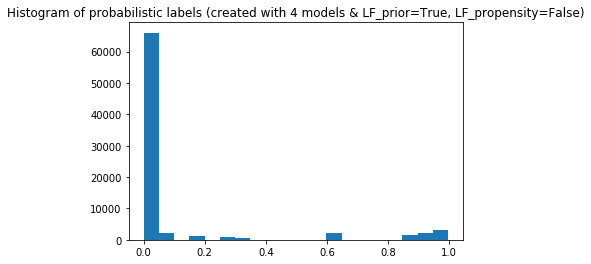

In [93]:
plt.hist(train_marginals, bins=20)
plt.title('Histogram of probabilistic labels (created with %i models & LF_prior=True, LF_propensity=False)'%n_models)
plt.show()

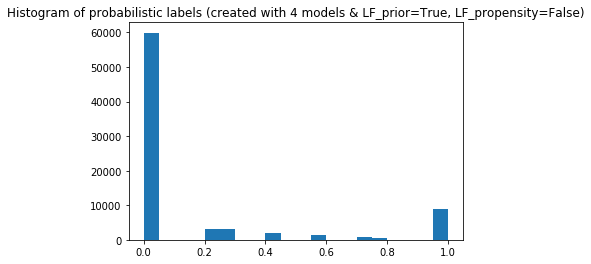

In [92]:
plt.hist(train_marginals_w_prior, bins=20)
plt.title('Histogram of probabilistic labels (created with %i models & LF_prior=True, LF_propensity=False)'%n_models)
plt.show()

# ~~ 

In [47]:
L_test = labeler.apply_existing(split=2)

Clearing existing...
Running UDF...
[========================================] 100%



In [49]:
# load from db gold labels
L_gold_test = load_gold_labels(session, annotator_name='gold', split=2)
L_gold_test

<13350x1 sparse matrix of type '<type 'numpy.int64'>'
	with 5781 stored elements in Compressed Sparse Row format>

In [50]:
_ = gen_model.error_analysis(session, L_test, L_gold_test)

Scores (Un-adjusted)
Pos. class accuracy: 0.259
Neg. class accuracy: 0.975
Precision            0.57
Recall               0.259
F1                   0.356
----------------------------------------
TP: 388 | FP: 293 | TN: 11557 | FN: 1112



In [51]:
L_test.lf_stats(session, L_gold_test, gen_model.learned_lf_stats()['Accuracy'])

,j,Coverage,Overlaps,Conflicts,TP,FP,FN,TN,Empirical Acc.,Learned Acc.
dummy,0,1.000000,0.433034,0.128764,0,0,1500,4281,0.740529,0.936173
LogisticRegression,1,0.433034,0.433034,0.128764,683,563,817,3718,0.761287,0.893057
SVC_linear,2,0.433034,0.433034,0.128764,594,592,906,3689,0.740875,0.888321
SVC_rbf_C100,3,0.433034,0.433034,0.128764,606,500,894,3781,0.758865,0.893826
SVC_rbf_C500,4,0.433034,0.433034,0.128764,625,484,875,3797,0.764920,0.897841
SVC_rbf_C1000,5,0.433034,0.433034,0.128764,577,480,923,3801,0.757308,0.899282
